In [3]:
import cv2
from matplotlib import pyplot as plt

### 机器学习手写数字集

In [4]:
from sklearn import datasets

In [3]:
D = datasets.load_digits()

In [6]:
X = D.data
Y = D.target

### Tensorflow手写数字集

In [10]:
from tensorflow.keras import datasets

In [40]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [41]:
x_train.shape

(60000, 28, 28)

In [43]:
y_train.shape

(60000,)

5


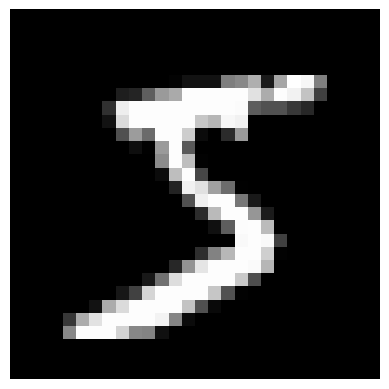

In [44]:
plt.imshow(x_train[0],'gray')
plt.axis('off')
print(y_train[0])

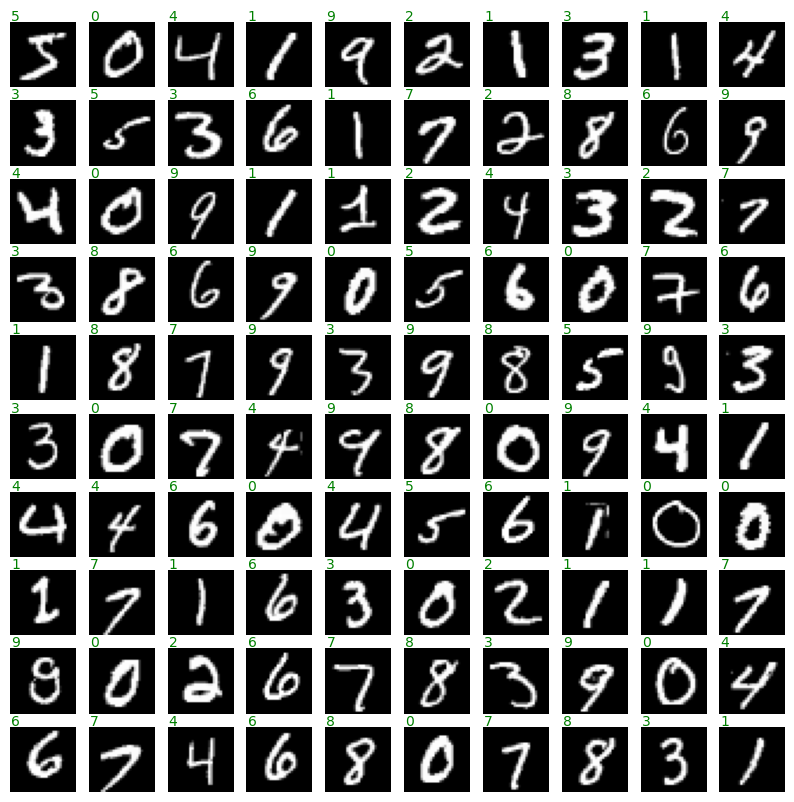

In [71]:

import matplotlib.pyplot as plt
 

fig, axes = plt.subplots(10, 10,figsize=(10,10))
for index,ax in enumerate(axes.flat):
    ax.imshow(x_train[index],'gray')
    ax.axis('off')
    ax.text(0,-1,y_train[index],c="green")

plt.show()

### 归一化

In [72]:
x_train_nor = x_train/255.*2-1

In [73]:
x_train_nor.min()

-1.0

In [74]:
x_train_nor.max()

1.0

### 波斯顿房价数据集

In [75]:
(B_x_train,B_y_train),(B_x_test,B_y_test) = datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 2us/step


In [77]:
B_x_train.shape

(404, 13)

### cifar100

In [82]:
(C_x_train,C_y_train),(C_x_test,C_y_test) = datasets.cifar100.load_data()

In [94]:
datasets.cifar100

<module 'keras.api._v2.keras.datasets.cifar100' from 'C:\\Users\\Administrator\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\cifar100\\__init__.py'>

In [83]:
C_x_train.shape

(50000, 32, 32, 3)

C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


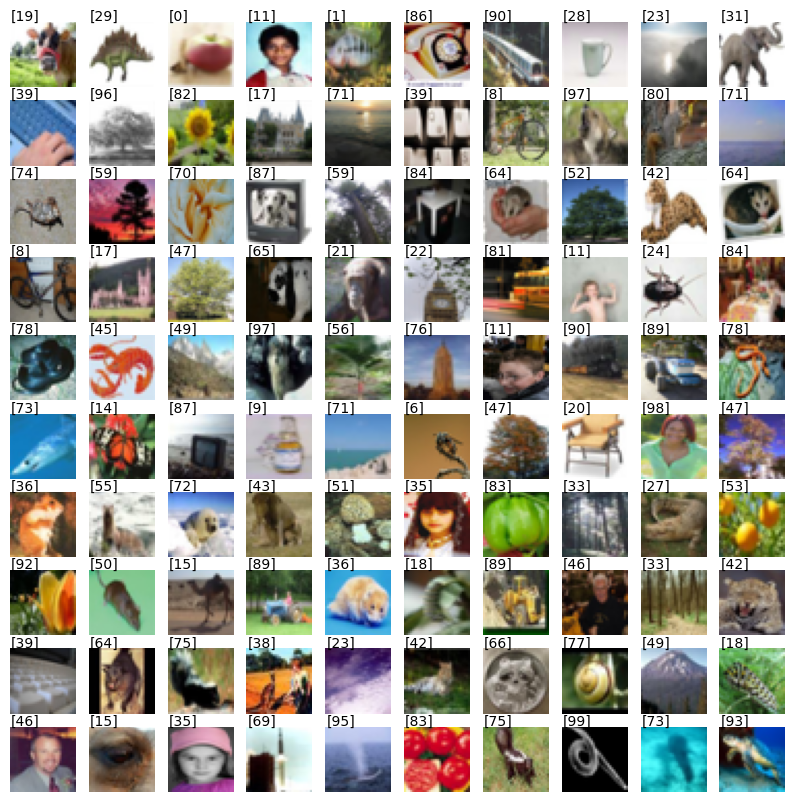

In [90]:
fig, axes = plt.subplots(10, 10,figsize=(10,10))
for index,ax in enumerate(axes.flat):
    ax.imshow(C_x_train[index])
    ax.axis('off')
    ax.text(0,-1,C_y_train[index])


plt.show()

In [73]:
import tensorflow as tf
from tensorflow.keras import datasets

In [74]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [75]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),#扁平化 相当于reshape(num,-1)
    tf.keras.layers.Dense(200,activation="relu"),#relu,sigmoid
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation='softmax')#输出层,节点数=类别数，激活函数用softmax 概率总和为1
])

In [76]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [77]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),validation_freq=1)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6170 - accuracy: 0.8290 - val_loss: 0.2847 - val_accuracy: 0.9180
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2608 - accuracy: 0.9244 - val_loss: 0.2191 - val_accuracy: 0.9379
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2023 - accuracy: 0.9416 - val_loss: 0.1775 - val_accuracy: 0.9473
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1658 - accuracy: 0.9524 - val_loss: 0.1501 - val_accuracy: 0.9556
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1407 - accuracy: 0.9596 - val_loss: 0.1339 - val_accuracy: 0.9599
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1217 - accuracy: 0.9648 - val_loss: 0.1226 - val_accuracy: 0.9630
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1069 - accuracy: 0.9691 - val_loss: 0.1146 - val_accuracy:

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.predict(x_test[0].reshape(-1,28,28))

array([[8.3152263e-06, 2.8947925e-06, 4.6866338e-04, 3.2125679e-03,
        3.2725588e-08, 1.5273228e-05, 1.7706609e-11, 9.9593300e-01,
        4.6138488e-05, 3.1307546e-04]], dtype=float32)

In [81]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

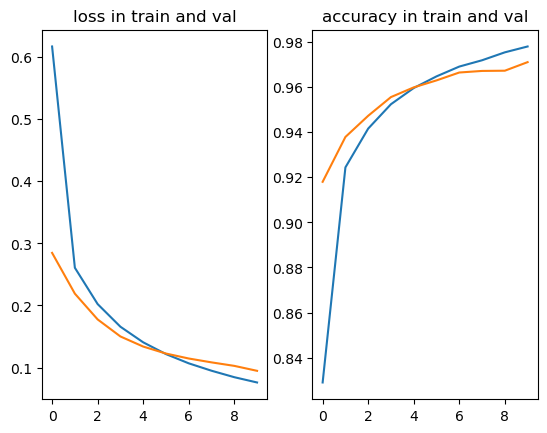

In [83]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.title("loss in train and val")

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title("accuracy in train and val")

plt.show()